# Stock Index Creation and Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.2f}'.format

## Data Import, Visualization and Normalization

In [6]:
stocks = yf.download(["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"], 
                     start = "2014-01-01", end = "2018-12-31").Close

[*********************100%***********************]  6 of 6 completed


In [7]:
stocks

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,116.81,69.34,112.50,28.72,31.06
2014-01-03,19.82,117.62,69.19,113.18,28.58,30.85
2014-01-06,19.68,118.30,68.93,112.79,28.45,30.20
2014-01-07,19.90,120.09,69.40,115.04,28.53,30.43
2014-01-08,20.10,120.35,68.38,113.98,28.22,29.89
...,...,...,...,...,...,...
2018-12-21,68.87,295.93,101.71,80.20,39.49,92.59
2018-12-24,67.20,285.83,97.93,77.77,38.15,88.72
2018-12-26,73.54,305.04,103.28,80.53,38.97,94.78


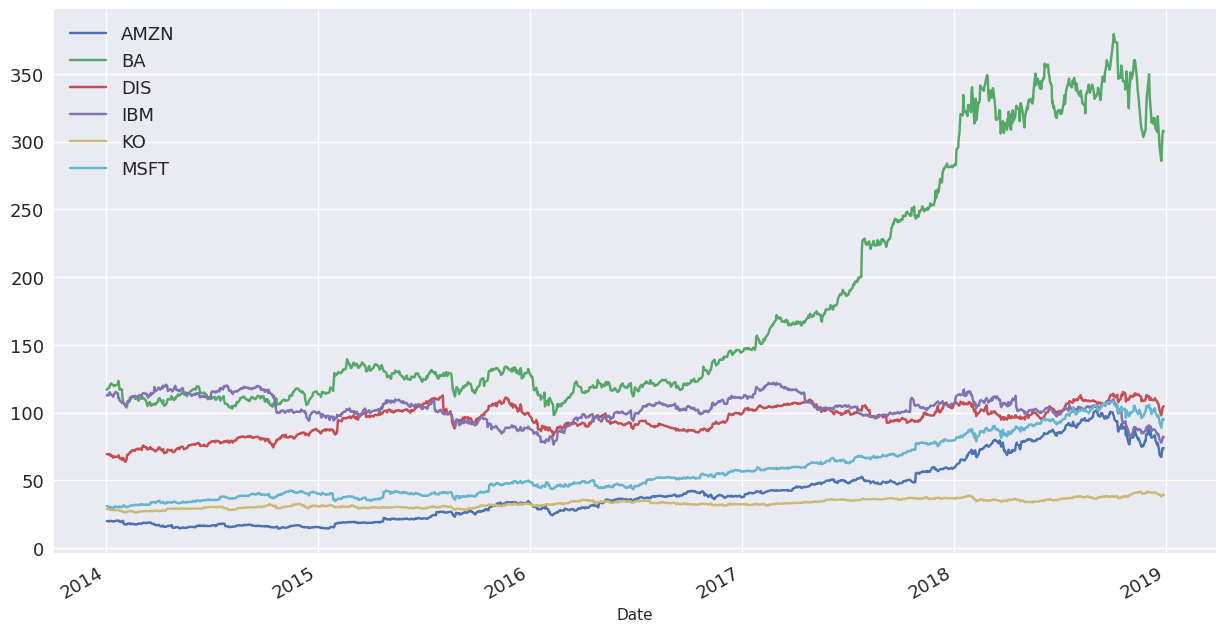

In [8]:
stocks.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [9]:
# Normalize the stocks
norm = stocks.div(stocks.iloc[0]).mul(100)
norm

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23
...,...,...,...,...,...,...
2018-12-21,346.12,253.35,146.68,71.29,137.48,298.10
2018-12-24,337.70,244.70,141.24,69.12,132.82,285.66
2018-12-26,369.60,261.15,148.95,71.58,135.65,305.17


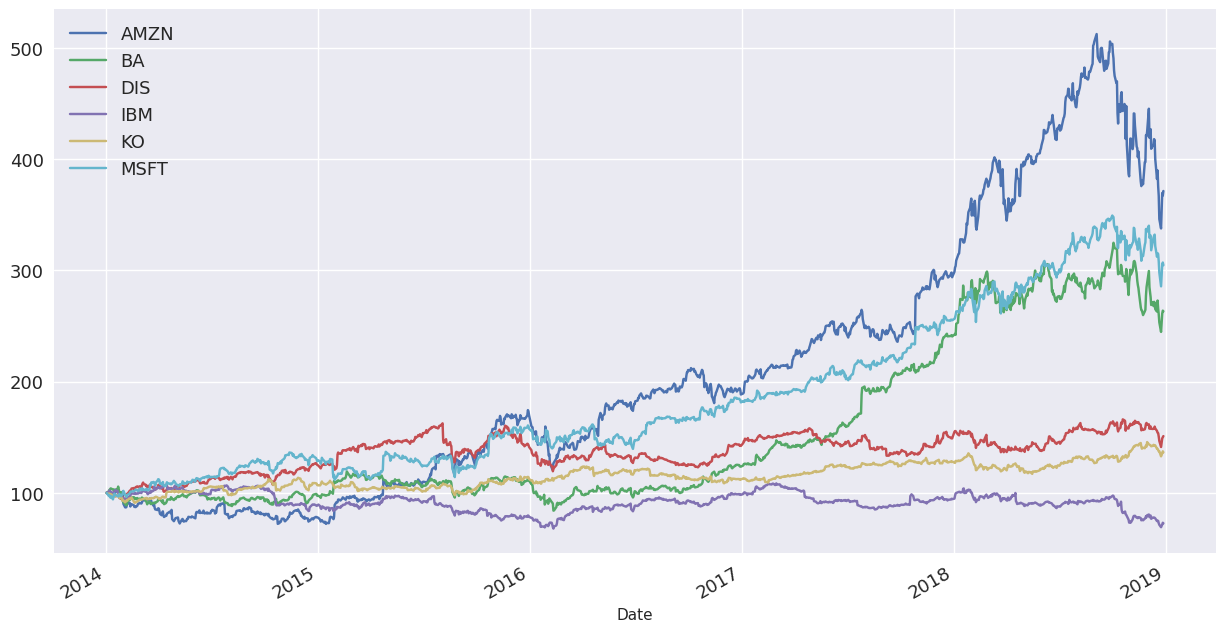

In [10]:
norm.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Creating a Price Weighted Index

In [11]:
stocks.head()

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,116.81,69.34,112.50,28.72,31.06
2014-01-03,19.82,117.62,69.19,113.18,28.58,30.85
2014-01-06,19.68,118.30,68.93,112.79,28.45,30.20
2014-01-07,19.90,120.09,69.40,115.04,28.53,30.43
2014-01-08,20.10,120.35,68.38,113.98,28.22,29.89


In [12]:
norm.head()

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23


In [13]:
stocks.sum(axis=1)

Date
2014-01-02   378.33
2014-01-03   379.24
2014-01-06   378.34
2014-01-07   383.40
2014-01-08   380.92
              ...  
2018-12-21   678.79
2018-12-24   655.60
2018-12-26   696.14
2018-12-27   702.28
2018-12-28   701.56
Length: 1257, dtype: float64

In [14]:
stocks.sum(axis=1).iloc[0]

np.float64(378.3295555114746)

In [15]:
stocks.sum(axis = 1).div(stocks.sum(axis = 1).iloc[0])

Date
2014-01-02   1.00
2014-01-03   1.00
2014-01-06   1.00
2014-01-07   1.01
2014-01-08   1.01
             ... 
2018-12-21   1.79
2018-12-24   1.73
2018-12-26   1.84
2018-12-27   1.86
2018-12-28   1.85
Length: 1257, dtype: float64

In [16]:
stocks.sum(axis = 1).div(stocks.sum(axis = 1).iloc[0]).mul(100)

Date
2014-01-02   100.00
2014-01-03   100.24
2014-01-06   100.00
2014-01-07   101.34
2014-01-08   100.68
              ...  
2018-12-21   179.42
2018-12-24   173.29
2018-12-26   184.00
2018-12-27   185.63
2018-12-28   185.44
Length: 1257, dtype: float64

In [18]:
# Creating an index of the combined stocks
norm["PWI"] = stocks.sum(axis = 1).div(stocks.sum(axis = 1).iloc[0]).mul(100)
norm

Ticker,AMZN,BA,DIS,IBM,KO,MSFT,PWI
Date,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.24
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.00
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.34
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.68
...,...,...,...,...,...,...,...
2018-12-21,346.12,253.35,146.68,71.29,137.48,298.10,179.42
2018-12-24,337.70,244.70,141.24,69.12,132.82,285.66,173.29
2018-12-26,369.60,261.15,148.95,71.58,135.65,305.17,184.00


In [27]:
weights_PWI = stocks.div(stocks.sum(axis = 1), axis =0)
weights_PWI

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.05,0.31,0.18,0.30,0.08,0.08
2014-01-03,0.05,0.31,0.18,0.30,0.08,0.08
2014-01-06,0.05,0.31,0.18,0.30,0.08,0.08
2014-01-07,0.05,0.31,0.18,0.30,0.07,0.08
2014-01-08,0.05,0.32,0.18,0.30,0.07,0.08
...,...,...,...,...,...,...
2018-12-21,0.10,0.44,0.15,0.12,0.06,0.14
2018-12-24,0.10,0.44,0.15,0.12,0.06,0.14
2018-12-26,0.11,0.44,0.15,0.12,0.06,0.14


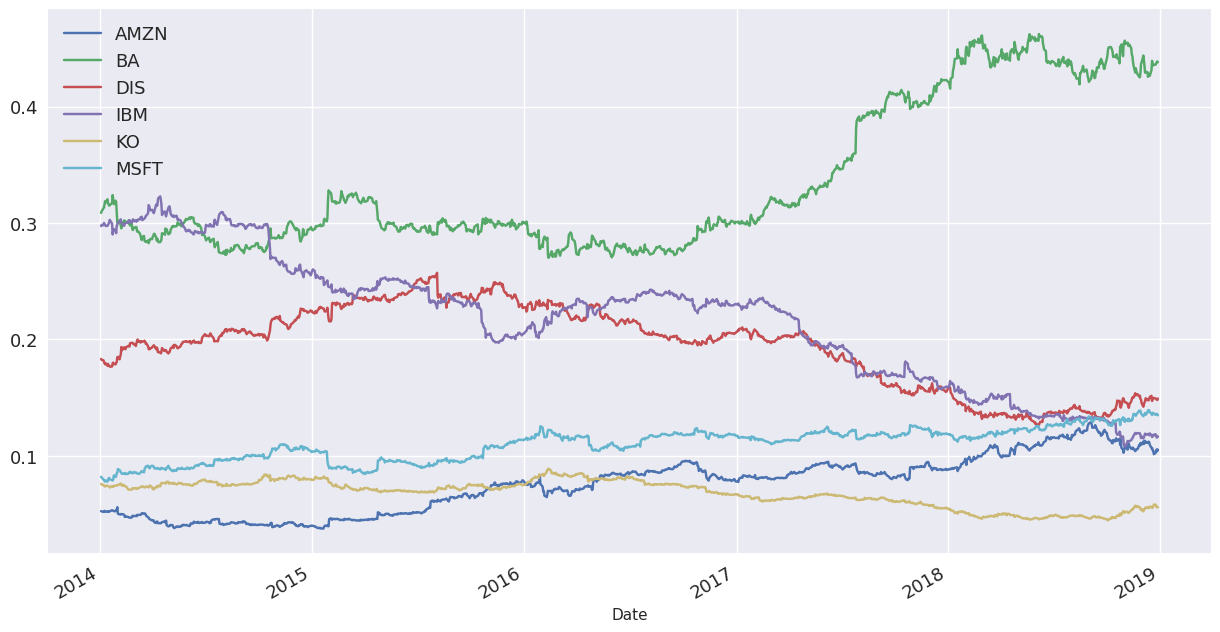

In [28]:
weights_PWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()